## Import Python libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 4)

import warnings
warnings.filterwarnings('ignore')

#  1 Multiple Linear Regression and Regression Error Metrics

## Read Data Set

In [4]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Data Preparation - EDA

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
# !pip install missingno
# eksik verilerin yapisini ve dagilimini gorsellestirir

In [9]:
import missingno as msno

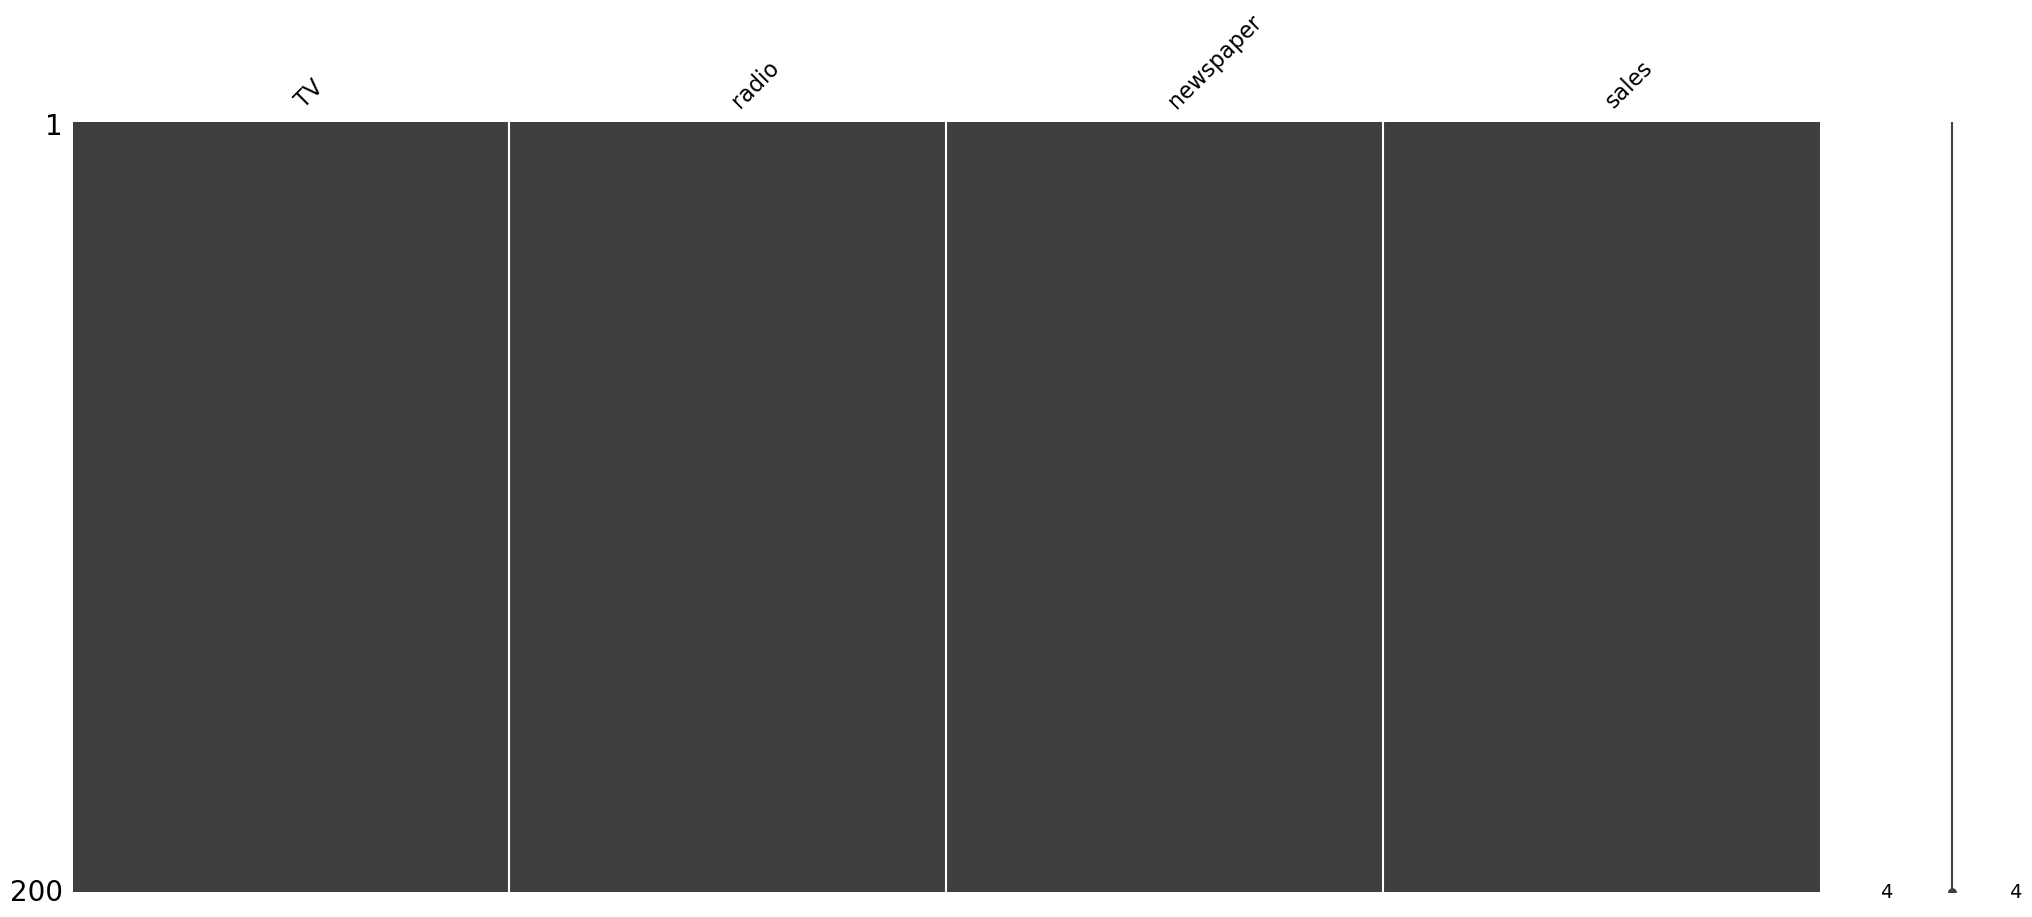

In [10]:
msno.matrix(df);

# örnek null hucreleri olan bir resim (farklı bir data setinden alınmıştır)

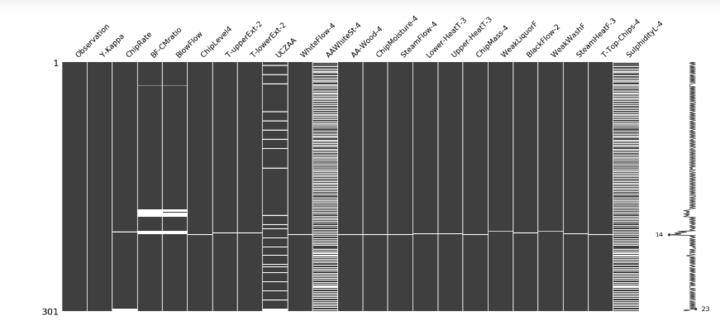

In [11]:
df.sort_values(by='sales',ascending=False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [13]:
# !pip install summarytools

In [14]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TV[float64],Mean (sd) : 147.0 (85.9)min < med < max:0.7 < 149.8 < 296.4IQR (CV) : 144.4 (1.7),190 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3cTY6iQBiA4a+G1qAmEGOiOy8wySxceog57BxhFp7AG7gzMQQj3UQEZjW7bn+qQOurfp91Q2N4Q9cPtmnbVgDf/Xj1BQD3eLv1A8aYkYgMLc9/btv2w/JYWAj1fl0N1Rgzms1mv5Mkmdqc/Hg8ZsaYP75++NCEfL9uPVGHSZJM1+v1R5qm5SMnzvM83mw208PhMBQR7z54oIK9Xzf/9IuIpGlazufzd4vzjyyOgaMQ7xeTKahAqFCBUKECoUIFQoUKhAoVCBUq3LWOiudx3AJNmqYZdHk9viBUj7hugVZVFdd1/bMsy78iYrPg7y2vQw31BYsrrLdARUR2u910u92OL5dL1MfFvZK3oYb8gsUttlugWZZ5uwXqyttQJeAXLPA4n0MVkTBfsPBVXdcDEUmMMban6G245X2oeI6iKAZVVf1aLpdRFEUPj49F+h1uEeoXvttE7nw+v8VxPF6tVuViscgePb7v4RahfuI7T+Qmk4ntUEukx+EWoX6OiZxngg3VcWKQNE0zSNM0YyLnhyBDdZ0YhLzDo1WQobpODFx3eBye5sHu1bsKMtT/bCcGLjs8Lk9znuRfCzrUV3B5moe8V++KUHti8zTXvlfvOIG9uvZMqOiE6wT21tozoaITLkOee9aeew21i7XMji8JPXPY2bo67OktVNYy0aXeQn31WibC0vsY9RVrmQgPX5eGCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChXu+tfoeZ7Hj574dDrFIiJFUcT7/X78zOO1/m6t1+16/D19/QMrB7y1WUnQAQAAAABJRU5ErkJggg=="">",0(0.0%)
2,radio[float64],Mean (sd) : 23.3 (14.8)min < med < max:0.0 < 22.9 < 49.6IQR (CV) : 26.5 (1.6),167 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsElEQVR4nO3cPW/aQBjA8ecggHmRLYQKG0vHSh088iH6YfsRMvAJMmTpxIaELBBuEMZ2l6ZLWsB3vsSP+//N8YtO/8R3p1NMWZYCNF3no18AuMfDrR8wxgxFpG95/3NZli+W1wJ/XA3VGDOczWbfwjCc2tz8cDgkxpjvxApXt/6i9sMwnK5Wq5coik5Vbrzf74P1ej3d7XZ9ESFUOLn56RcRiaLoNJ/Pf1rcf2hxDfAGiymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQoW7DqWgGs7w1o9Qa8YZXj8ItX6c4fWAUD3hDG+9Gh0qc73qHMesIyKFw+O9jXljQ2WuV53LmOV53kvT9PNkMvnR6XQym+f7HPPGhirM9WxYj9lms5k+PT19iuP4ebFYJFUf7HvMvYaa53lPREJjjM3lYVEUvSiKEuZ61djMj5MkGYqIjMdj27m1iMcx9xZqmqa9LMu+LpfLbrfbrfTbLSKSZVmQ5/mX0+n0KCK2A4eW8Bbq+Xx+CIJgFMfxyeZT8vtTNLpcLl0f7wddvM9RbT8lr58iQKTZi6kP5bDNExZF0av7ff53hPoXLts8zK39aG2orjsOk8lkvlqtDpbbPMyta9bKUOvacRgMBo+22zyoVytDZcehfVoZ6it2HNqDE/5QodV/UfG+HBewV09eESpq4bqAvXXyilAbpo6DPDW/0l1cFrD3nLwi1AZpw0Eeh9NXVxewhNogbKv9G6E2ENtqb7E9BRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS4639P7ff7oOqNj8djICKSpmmw3W5H73m91mdrfW/X6+/p6xfCCaHWusjxaAAAAABJRU5ErkJggg=="">",0(0.0%)
3,newspaper[float64],Mean (sd) : 30.6 (21.8)min < med < max:0.3 < 25.8 < 114.0IQR (CV) : 32.4 (1.4),172 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACY0lEQVR4nO3cPY7aQBiA4W/MgsyCbCEi6GjSp6DkEDlsroDELXIBJGtlxMQI5DhNiCItC3jGTuYbvU+9YyhemZ0f2zRNI0Dokv/9BYBnvDz6A2PMWERGjtc/N01TOY4F/rgbqjFmPJ/Pv2ZZNnO5+OFweDPGfCNW+Hp0Rx1lWTbbbDZVnuenNhcuyzLd7XazoihGIkKo8PLwp19EJM/z02Kx+OFw/bHDGOAdJlNQgVChAqFCBUKFCoQKFZ6a9buq63ooIpkxxvUSbBhARHoM1Vo7vFwuX1ar1WAwGLRag71iwwBXvYV6Pp9f0jR9Xa/Xp+Vy+dZ2PBsG+FuvP/0iIpPJxHWzQIQNA/zGZAoqECpUIFSoQKhQoffJlA/PdVjWYCMSbKi+67CswcYl2FB91mFZg41PsKFeeazDsgYbESZTUIFQoQKhQoXg/0d1xRHDuEQZKkcM4xNlqBwxjE+UoV5xxDAeTKagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoULUO1M+eF4rLIR6A89rhYdQb+B5rfAQ6h08rxUOJlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqMCCfw84J9A9Qu0Y5wT6Qagd45xAPwi1J5wT6BaTKajAHTUwvIXwNkINCG8h/BihBoS3EH6MUAPEWwjfYzIFFQgVKhAqVCBUqECoUIFQoQLLU5GJ9YghoUYk5iOGhBoR3yOG2+12URTFJ2PMwfErJCLy03Hs3bv5U6GWZZm2/dTj8ZiKiFhr0/1+//ovx2v97K6+t4uqqrzuxnVdD621n6fT6fckSS5txz+6m/8CVzmUDQaXxEgAAAAASUVORK5CYII="">",0(0.0%)
4,sales[float64],Mean (sd) : 14.0 (5.2)min < med < max:1.6 < 12.9 < 27.0IQR (CV) : 7.0 (2.7),121 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2F

In [15]:
# mean ve Std değerleenini birbirine yakınlığının outlier tespitindeki önemi hakkında bir örnek

print ( np.mean([100,110,120,115]))
print ( np.std([100,110,120,115]))

111.25
7.39509972887452


In [16]:
print ( np.mean([100,110,120,700]))
print ( np.std([100,110,120,700]))

257.5
255.57533136044253


In [17]:
print ( np.mean([100,110,120,900]))
print ( np.std([100,110,120,900]))

307.5
342.153109002388


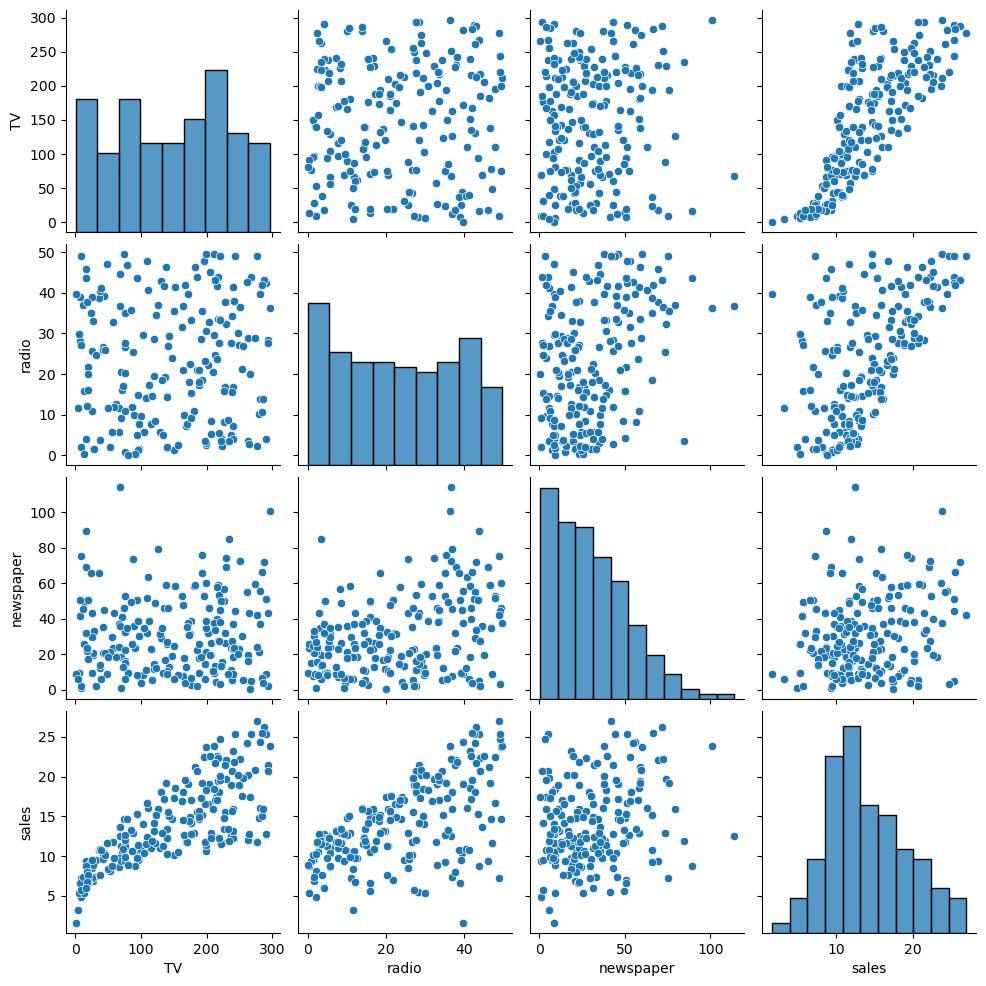

In [18]:
sns.pairplot(df);

<Axes: >

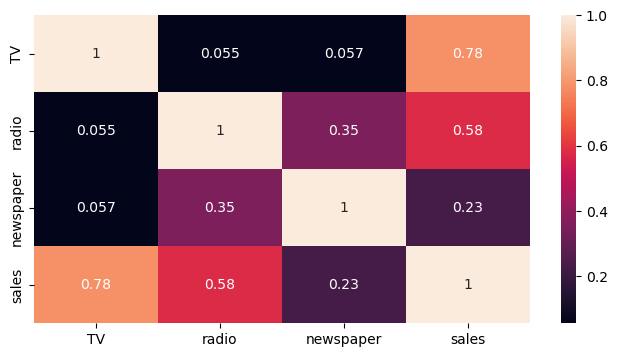

In [19]:
sns.heatmap(df.corr(), annot=True)

In [20]:
from scipy.stats import skew

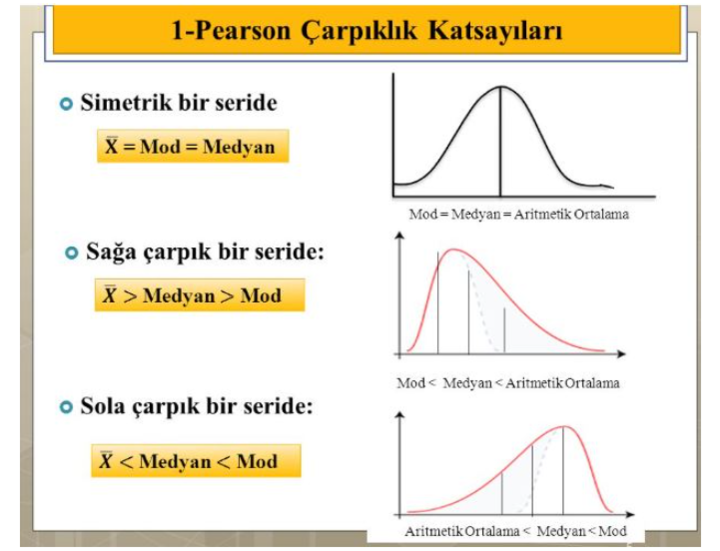

In [21]:
# skewness tespiti için bir döngü
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))
# sales sütunu haricindeki tüm feature ların skewness degerini hesplar

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


- -0.5 ile + 0.5 arasındaki skewness degerlerinde dagılımın kabaca simetrik oldugu kabul edilebilir

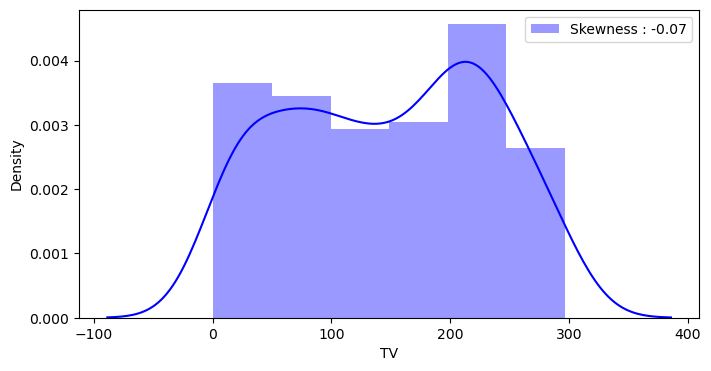

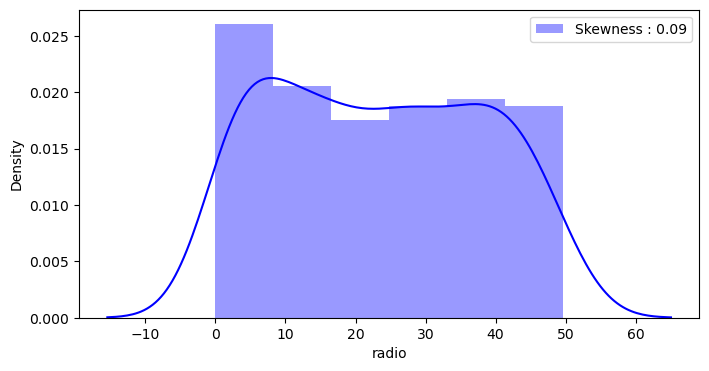

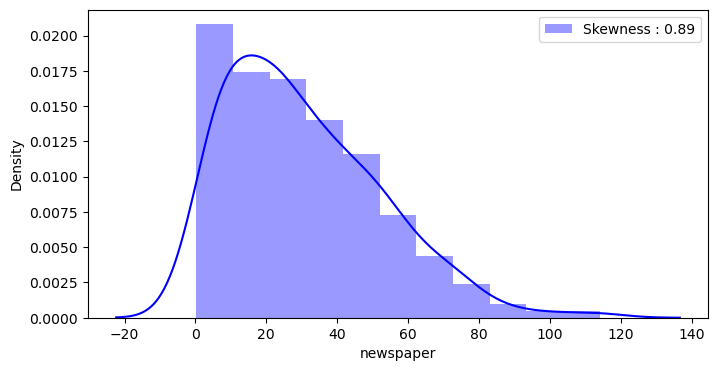

In [22]:
for j in df.drop(columns = "sales").columns:     #"sales" sütunu dataframe'den kaldırılıyor
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))   #  j sütununa ait veri dağılımı grafiği çiziliyor. grafiğin üzerinde gösterilen etiketi oluşturur. Etiket, o sütunun çarpıklık değerini (skewness) içerir
    g = g.legend(loc= "best")   #  grafiğin üzerine eklenen etiketin konumunu en iyi yere yerleştirmes
    plt.show()

In [1]:
#!pip install ydata_profiling

In [24]:
from ydata_profiling import ProfileReport

In [25]:
pr_df = ProfileReport(df)

In [26]:
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 2 Train - Test Split

In [27]:
# !pip install scikit-learn

In [28]:
X = df.drop(columns = 'sales') #df[['TV', 'radio', 'newspaper']]. Indep. variable'lar X e atadim
y = df['sales'] #Modelimin onune hedef olarak target variable atadim.

print(X, y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [29]:
from sklearn.model_selection import train_test_split

# Veri setinizi randomly olarak egitim(training) ve test(testing) alt kumelerine ayirmak icin kullanilir.

**X_train**: Eğitim veri setinin özelliklerini (features) içerir.

**X_test**: Test veri setinin özelliklerini (features) içerir.

**y_train**: Eğitim veri setinin etiketlerini (labels/targets) içerir.

**y_test**: Test veri setinin etiketlerini (labels/targets) içerir.

**train_test_split(X, y, test_size=0.3, random_state=42):** Bu fonksiyon çağrısı ile X (özellikler) ve y (etiketler) veri setleri rastgele olarak eğitim ve test alt kümelerine ayrılır.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

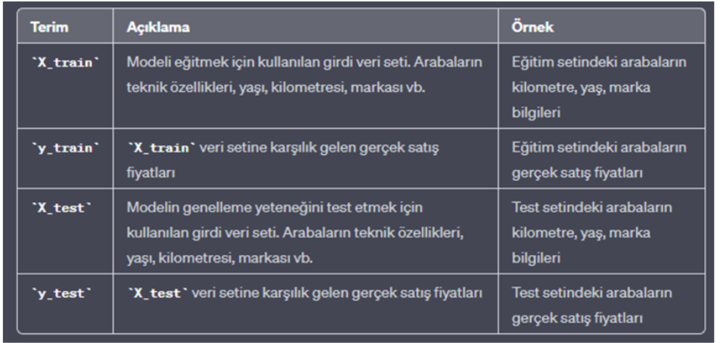

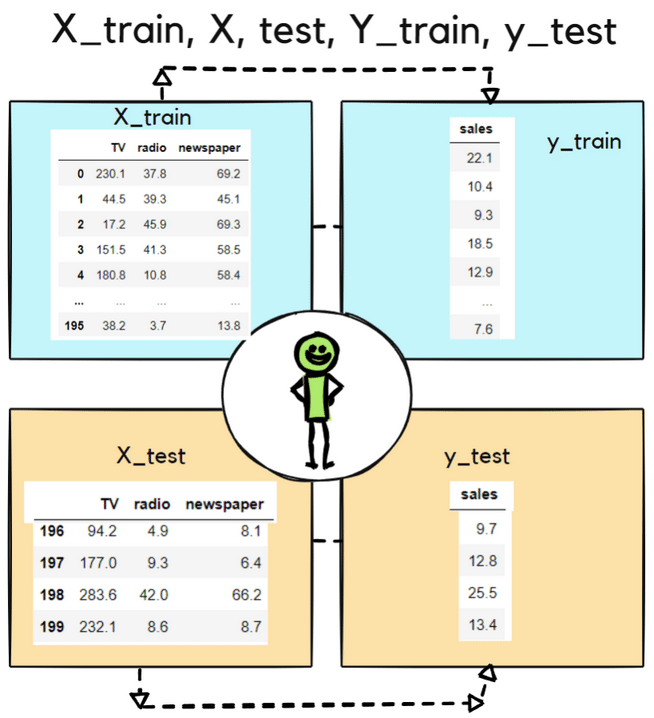

In [31]:
df.sample(15)

,TV,radio,newspaper,sales
105,137.9,46.4,59.0,19.2
15,195.4,47.7,52.9,22.4
16,67.8,36.6,114.0,12.5
78,5.4,29.9,9.4,5.3
86,76.3,27.5,16.0,12.0
169,284.3,10.6,6.4,15.0
102,280.2,10.1,21.4,14.8
11,214.7,24.0,4.0,17.4
119,19.4,16.0,22.3,6.6
38,43.1,26.7,35.1,10.1


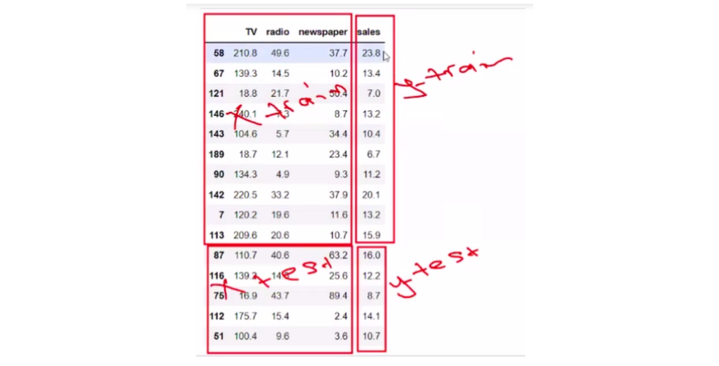

In [32]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


In [33]:
#Print("Train features shape: ", X_train.shape)
#Print("Train target shape: ", y_train.shape)
#Print("Test features shape: ", X_test.shape)
#Print("Test target shape: ", y_test.shape)

In [34]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [35]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

# 3 Model Fitting and Compare Actual and Predicted Labels

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred =model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [40]:
model.coef_ # modelin katsayilarini verir (TV: 0.04, radio:0.199, newspaper:0.006)

array([0.04405928, 0.1992875 , 0.00688245])

In [41]:
model.feature_names_in_   # yukaridaki katsayilarin karsilik geldigi feature lari verir

array(['TV', 'radio', 'newspaper'], dtype=object)

In [42]:
model.intercept_ # modeldeki sabit sayiyi verir

2.70894909251591

y_pred = b1 * TV + b2 * radio + b3 * newspaper + b0

In [43]:
# herhangi bir satırdaki degerler için tahmin yapalım..manuel olarak y_pred hesapladım
# bu deger y_test kumesindeki 95.satir degeri olan 16.9 gercek degerinin manulek olarak tahmin edilen halidir.
sum(X_test.loc[95]*model.coef_) + model.intercept_

16.565396297434837

In [44]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual":y_test - y_pred}


# Actual: gercek deger, pred: tahmin edilen deger, residual: gercek deger - tahmin edilen deger

In [45]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [46]:
results_sample = comparing.head(25)
results_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


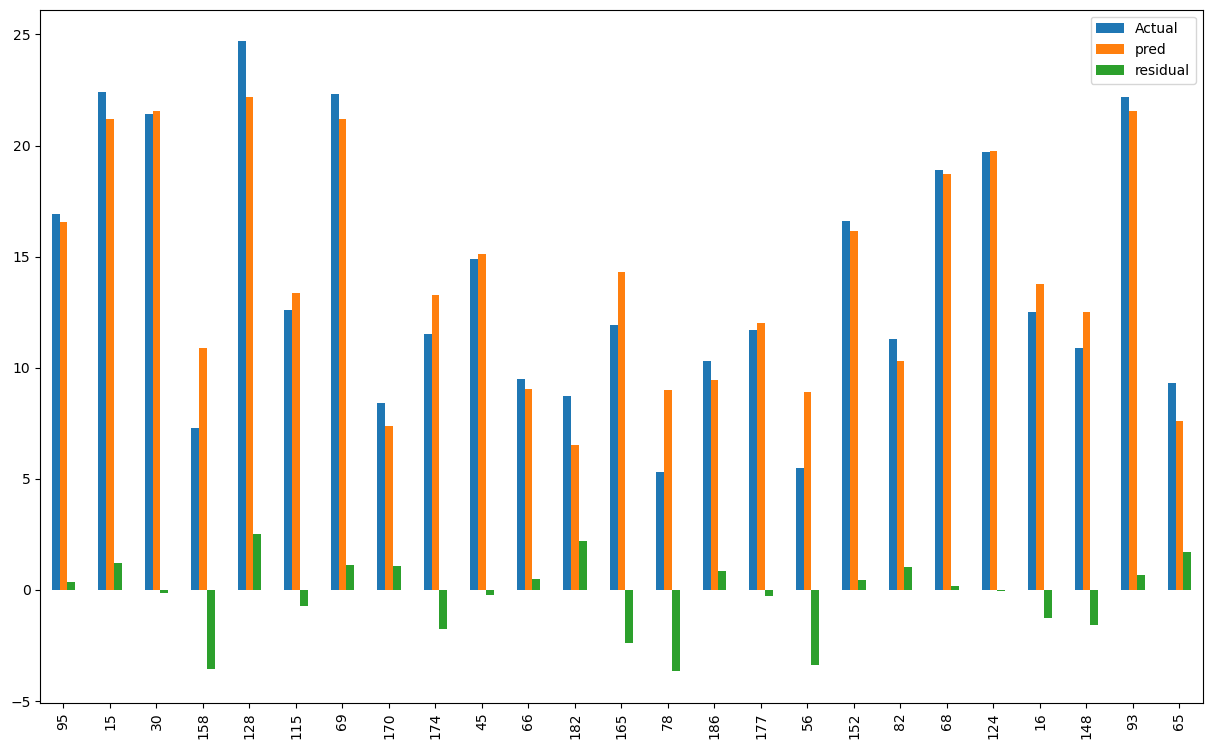

In [47]:
results_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

# 4 Error Metrics

In [ ]:
# modelin basarisini olcelim.

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# performans degerlendirme icin error metrikleri
# RMSE metrigini manuel hesaplayacagiz

In [50]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230368

In [51]:
# Mean Absolute Error hesabı
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549084

In [52]:
# MSE hesabi

mse = mean_squared_error(y_test, y_pred)
mse

3.79679723671522

In [53]:
# RMSE (Root-Mean Squared Error) hesabi

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446387

In [54]:
# Ortalama Hata Orani
sales_mean = df['sales'].mean()
sales_mean

14.0225

In [55]:
# MAE Hata Oranı - "0' a yakın olması iyi bir tahmin modeli oldugunu gösterir"
mae / sales_mean

0.10780311802138764

In [56]:
# RMSE Hata Orani

rmse / sales_mean

0.138957903679418

# 5 Adjusted R2 Score (Duzeltilmis R2 degeri)

In [ ]:
n = gözlem sayım (data noktası sayısı)
p = feature
Adjusted R2 = 1 - [(1 - R2) * (n - 1) / (n - p - 1)]

In [58]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)    #R2 scor
    n = df.shape[0]      # number of observations gözlem
    p =df.shape[1]-1    # number of indep. variable = feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [59]:
adj_r2(y_test, y_pred, df)

0.8588182832335934

In [60]:
# Error metricleri hesaplayan ve yazan kod blogu
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [61]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549084
MSE 		: 3.79679723671522
RMSE 		: 1.9485372043446387


In [62]:
# Overfitting kontrolü için train data daki R2 yi bulalım ve yukardak test R2 (0.86) ile karşılaştıralım

In [63]:
# X_train degerlerini prediction yapacağız
y_train_pred = model.predict(X_train)

In [64]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.158150294807253
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


In [71]:
residuals = y_test - y_pred

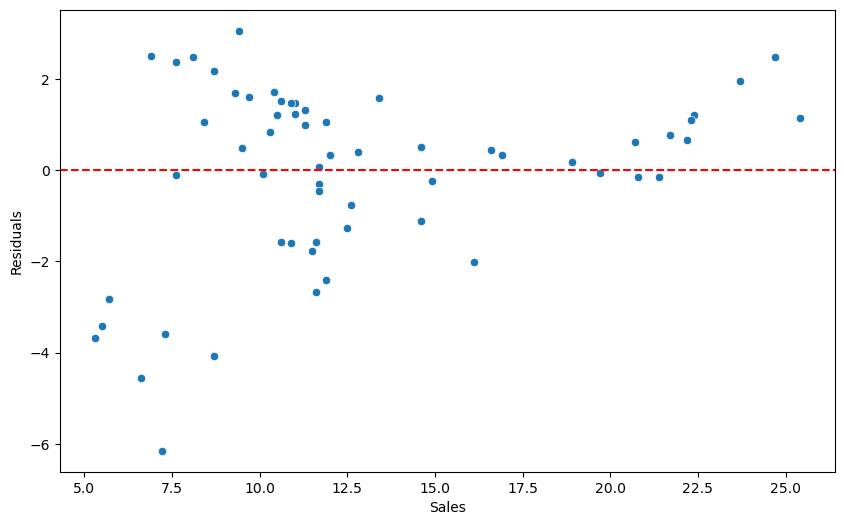

In [74]:
plt.figure(figsize=(10,6))

sns.scatterplot(x= y_test, y=residuals)
plt.xlabel('Sales')
plt.ylabel('Residuals')

plt.axhline(y=0, color='r', linestyle='--')
plt.show()

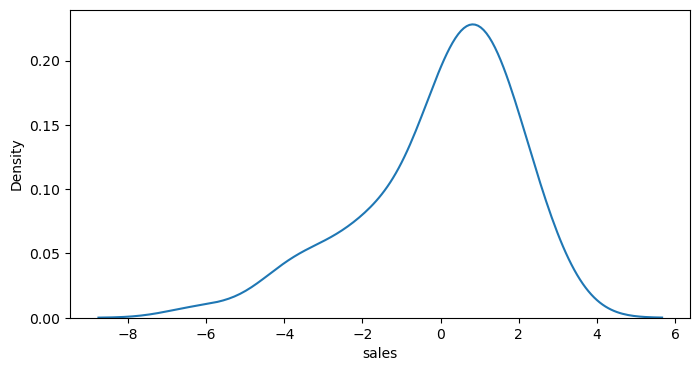

In [75]:
sns.kdeplot(residuals);

In [80]:
from scipy import stats

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-6.15360735, -4.5531472 , -4.07770578, -3.67026042, -3.58923816,
         -3.41549403, -2.81412012, -

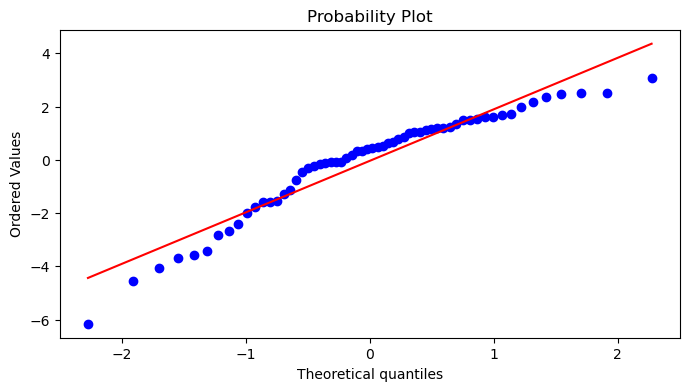

In [81]:
stats.probplot(residuals, dist='norm', plot = plt)

In [77]:
skew(residuals)

-0.9865673346742742

In [ ]:
# pip install yellowbrick

In [83]:
from yellowbrick.regressor import ResidualsPlot

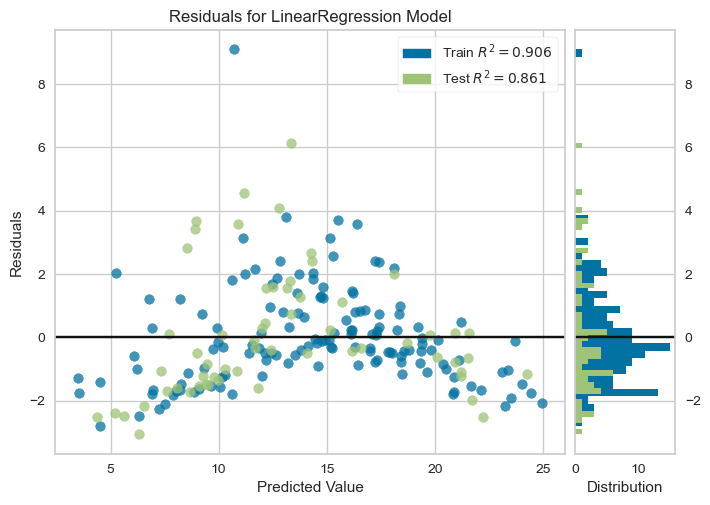

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [84]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

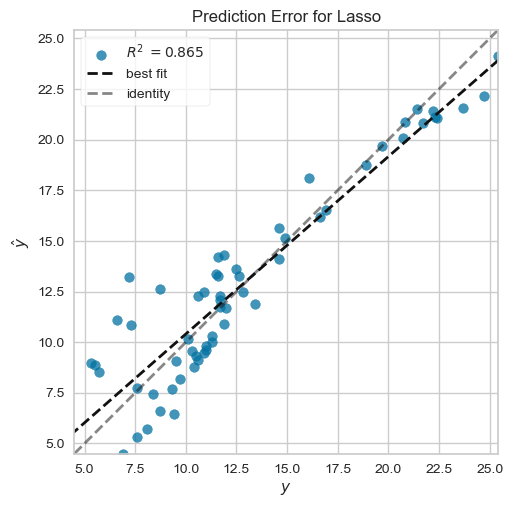

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [88]:
### INTERVIEW SORUSU
# Regresyon Modeli icin kriterler:
# 1-) Korelasyon olacak
# 2-) Residual larda pattern olmayacak

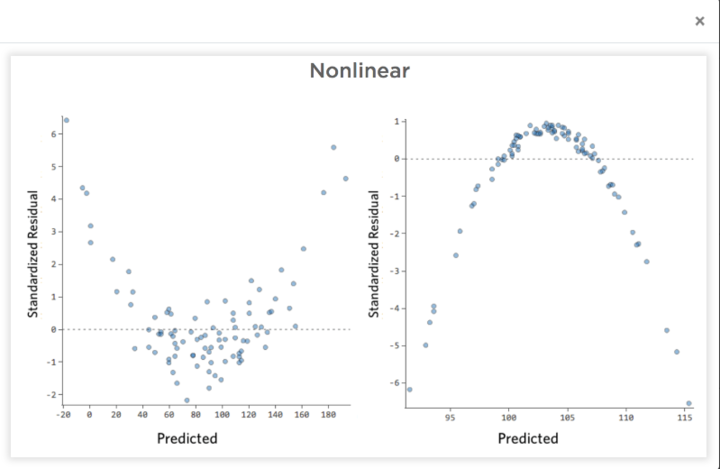

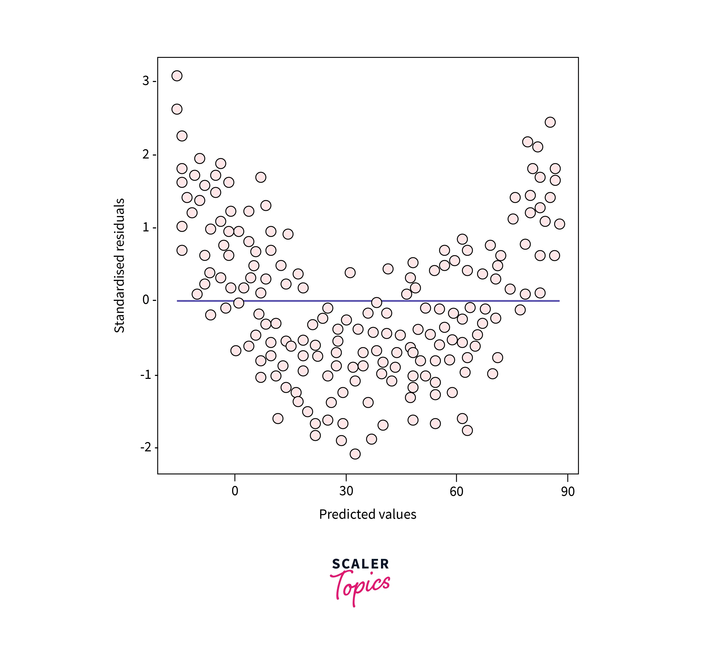

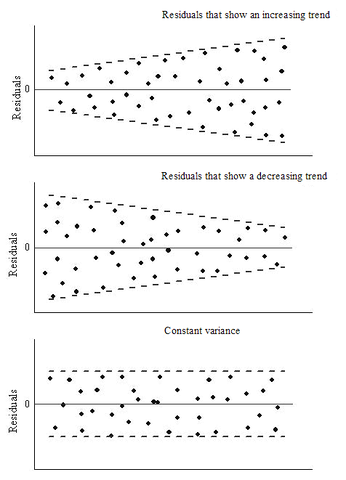

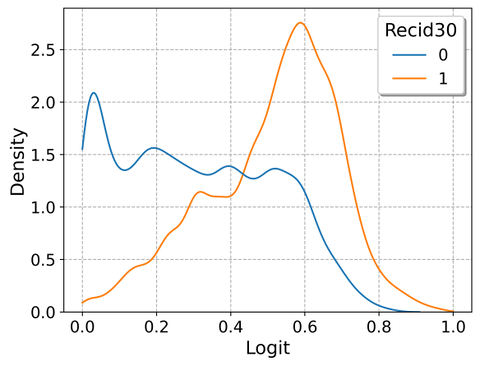

In [89]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [90]:
final_model.coef_ 

array([ 0.04576465,  0.18853002, -0.00103749])

In [91]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [92]:
final_model.intercept_

2.9388893694594067

In [93]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [94]:
adv = [[150,20,15]]

In [95]:
final_model.predict(adv)

array([13.55862413])

In [96]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_  # yeni datanın değerini manuel olarak sağlamasını yaptık.

13.558624130495994